In [23]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm

In [3]:
#Physics parameters

G = 6.67e-11
mT = 5.9736e24
mL = 0.07349e24
dTL = 3.844e8
w = 2.6617e-6
rT = 6.3781e6
rL = 1.7374e6

In [4]:
t = np.arange(0,1e6,1)

In [5]:
def System(R,t,G,mT,mL,dTL,w):
    
    r,phi,p_r,p_phi = R
    Delta = G*mT/dTL**3
    mu = mL/mT
    r_prima = np.sqrt(1+r**2-2*r*np.cos(phi-w*t))
    
    drdt = p_r
    dphidt = p_phi/r**2 
    dp_rdt = (p_phi**2/r**3) - Delta*(1/r**2 + (mu/r_prima**3)*(r-np.cos(phi-w*t)))
    dp_phidt = -(Delta*mu*r/r_prima**3)*np.sin(phi-w*t)
    
    return np.array([drdt,dphidt,dp_rdt,dp_phidt])

In [65]:
v_scape = 11.1e3/dTL
phi_0 = 340*np.pi/180
theta_0 = 25 *np.pi/180
r0 = 6.371e6/dTL

R0 = [r0, phi_0, v_scape*np.cos(theta_0-phi_0), v_scape*r0*np.sin(theta_0-phi_0)]

# CON ODEINT

In [66]:
sol = integrate.odeint(System, R0, t, args=(G,mT,mL,dTL,w))

In [67]:
r = sol[:,0]
phi = sol[:,1]
p_r = sol[:,2]
p_phi = sol[:,3]

In [68]:
xL = dTL*np.cos(w*t)
yL = dTL*np.sin(w*t)

xT = r*np.cos(phi)*dTL
yT = r*np.sin(phi)*dTL

In [69]:
scale = 10000

<IPython.core.display.Javascript object>


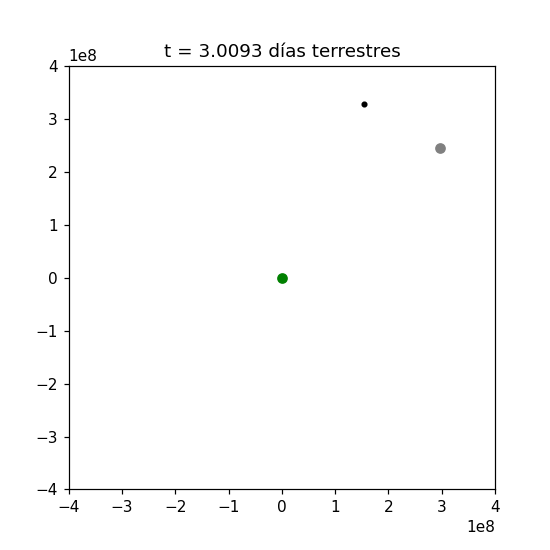

In [70]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

t1 = t[::scale]*(1/60)*(1/60)*(1/24)

def init():
    
    ax.clear()
    ax.set_xlim(-4e8,4e8)
    ax.set_ylim(-4e8,4e8)
    
def Update(i):
    init()
    ax.scatter(xL[::scale][i],yL[::scale][i],color='gray' )
    ax.scatter(0,0,color="g")
    ax.set_title("t = {:.4f} días terrestres".format(t1[i]))
    #Earth = plt.Circle((0,0),rT,color="green",fill=True)
    #Moon = plt.Circle((xL[::scale][i],yL[::scale][i]),rL,color="gray",fill=True)
    #ax.add_patch(Earth)
    #ax.add_patch(Moon)
    ax.scatter(xT[::scale][i],yT[::scale][i],marker=".",color="black")
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t[::scale]),init_func=init)

# CON RUNGEKUTTA DE ORDEN 4

In [71]:
def IntegratorRungeKutta4(f,R0,t,G,mT,mL,dTL,w):
    
    h = t[1] - t[0]
    
    r = np.zeros_like(t)
    phi = np.zeros_like(t)
    
    p_r = np.zeros_like(t)
    p_phi = np.zeros_like(t)
    
    r[0] = R0[0]
    phi[0] = R0[1]
    p_r[0] = R0[2]
    p_phi[0] = R0[3]

    for i in tqdm(range(1,len(t))):
        
        R = np.array([r[i-1],phi[i-1],p_r[i-1],p_phi[i-1]])
        
        K1 = f(R,t[i-1],G,mT,mL,dTL,w)
        
        R = np.array([r[i-1]+0.5*h*K1[0],phi[i-1]+0.5*h*K1[1],
                      p_r[i-1]+0.5*h*K1[2],p_phi[i-1]+0.5*h*K1[3]])
        
        K2 = f(R,t[i-1]+0.5*h,G,mT,mL,dTL,w)
        
        R = np.array([r[i-1]+0.5*h*K2[0],phi[i-1]+0.5*h*K2[1],
                      p_r[i-1]+0.5*h*K2[2],p_phi[i-1]+0.5*h*K2[3]])
        
        K3 = f(R,t[i-1]+0.5*h,G,mT,mL,dTL,w)
        
        R = np.array([r[i-1]+h*K3[0],phi[i-1]+h*K3[1],
                      p_r[i-1]+h*K3[2],p_phi[i-1]+h*K3[3]])
        
        K4 = f(R,t[i-1]+h,G,mT,mL,dTL,w)
        
        r[i] = r[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
        phi[i] = phi[i-1] + (1/6)*h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
        
        p_r[i] = p_r[i-1] + (1/6)*h*(K1[2]+2*K2[2]+2*K3[2]+K4[2])
        p_phi[i] = p_phi[i-1] + (1/6)*h*(K1[3]+2*K2[3]+2*K3[3]+K4[3])
        
    return r,phi,p_r,p_phi

In [72]:
sol2 = IntegratorRungeKutta4(System,R0,t,G,mT,mL,dTL,w)

100%|████████████████████████████████████████████████████████████████████████| 999999/999999 [02:50<00:00, 5865.53it/s]


In [33]:
r1 = sol2[0]
phi1 = sol2[1]
p_r1 = sol2[2]
p_phi1 = sol2[3]

In [34]:
xL1 = dTL*np.cos(w*t)
yL1 = dTL*np.sin(w*t)

xT1 = r*np.cos(phi1)*dTL
yT1 = r*np.sin(phi1)*dTL

<IPython.core.display.Javascript object>


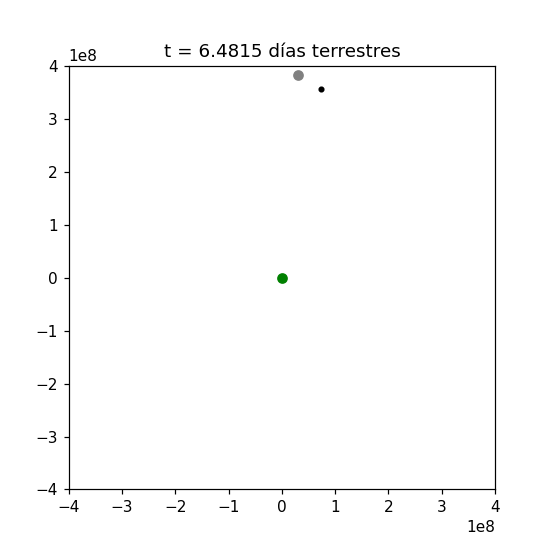

In [39]:
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot()

t1 = t[::scale]*(1/60)*(1/60)*(1/24)

def init1():
    
    ax1.clear()
    ax1.set_xlim(-4e8,4e8)
    ax1.set_ylim(-4e8,4e8)
    
def Update1(i):
    init1()
    ax1.scatter(xL1[::scale][i],yL1[::scale][i],color='gray' )
    ax1.scatter(0,0,color="g")
    ax1.set_title("t = {:.4f} días terrestres".format(t1[i]))
    #Earth = plt.Circle((0,0),rT,color="green",fill=True)
    #Moon = plt.Circle((xL[::scale][i],yL[::scale][i]),rL,color="gray",fill=True)
    #ax.add_patch(Earth)
    #ax.add_patch(Moon)
    ax1.scatter(xT1[::scale][i],yT1[::scale][i],marker=".",color="black")
        
Animation1 = anim.FuncAnimation(fig1,Update1,frames=len(t[::scale]),init_func=init)